# 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [3]:
rocket = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/refs/heads/main/RocketLaunchDataCSV.csv')
# rocket = pd.read_csv('data/RocketLaunchDataCSV.csv')
rocket.head(3)

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,04-Dec-58,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26,Cloudy,NaN
1,NaN,05-Dec-58,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26,Cloudy,NaN
2,Pioneer 3,06-Dec-58,1:45,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25,Cloudy,NaN


# 데이터 탐색 및 전처리

In [4]:
rocket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          60 non-null     object 
 1   Date                          300 non-null    object 
 2   Time (East Coast)             59 non-null     object 
 3   Location                      300 non-null    object 
 4   Crewed or Uncrewed            60 non-null     object 
 5   Launched?                     60 non-null     object 
 6   High Temp                     299 non-null    float64
 7   Low Temp                      299 non-null    float64
 8   Ave Temp                      299 non-null    float64
 9   Temp at Launch Time           59 non-null     float64
 10  Hist High Temp                299 non-null    float64
 11  Hist Low Temp                 299 non-null    float64
 12  Hist Ave Temp                 299 non-null    float64
 13  Perci

## 자료형 변환

In [5]:
# rocket['Sea Level Pressure'].astype('float') 
# 변환할 수 없는 값은 null처리
rocket['Sea Level Pressure'] = pd.to_numeric(rocket['Sea Level Pressure'], errors='coerce')
rocket['Sea Level Pressure'].head(3)

0    30.22
1    30.20
2    30.25
Name: Sea Level Pressure, dtype: float64

In [6]:
def time_to_decimal(time_str):
    try:
        # 시간과 분을 분리
        hours, minutes = map(int, time_str.split(':'))
        # 24시간 기준으로 소수점 변환 (시간 + 분/60)
        return hours + minutes/60
    except:
        return None

# 컬럼에 적용
rocket['Day Length'] = rocket['Day Length'].apply(time_to_decimal)
# 형 변환을 하는데 한 번에 싹 되지가 않고 뭔가 함수를 적용해야 되는 경우는 직접 함수를 만들어서 변환하기도 함 (제공되는 게 없을 땐)

# 확인
print("변환된 값 샘플:", rocket['Day Length'].head())
print("데이터 타입:", rocket['Day Length'].dtype)

변환된 값 샘플: 0    10.433333
1    10.433333
2    10.416667
3    10.416667
4    12.400000
Name: Day Length, dtype: float64
데이터 타입: float64


## object 타입인 변수의 데이터 분포 확인

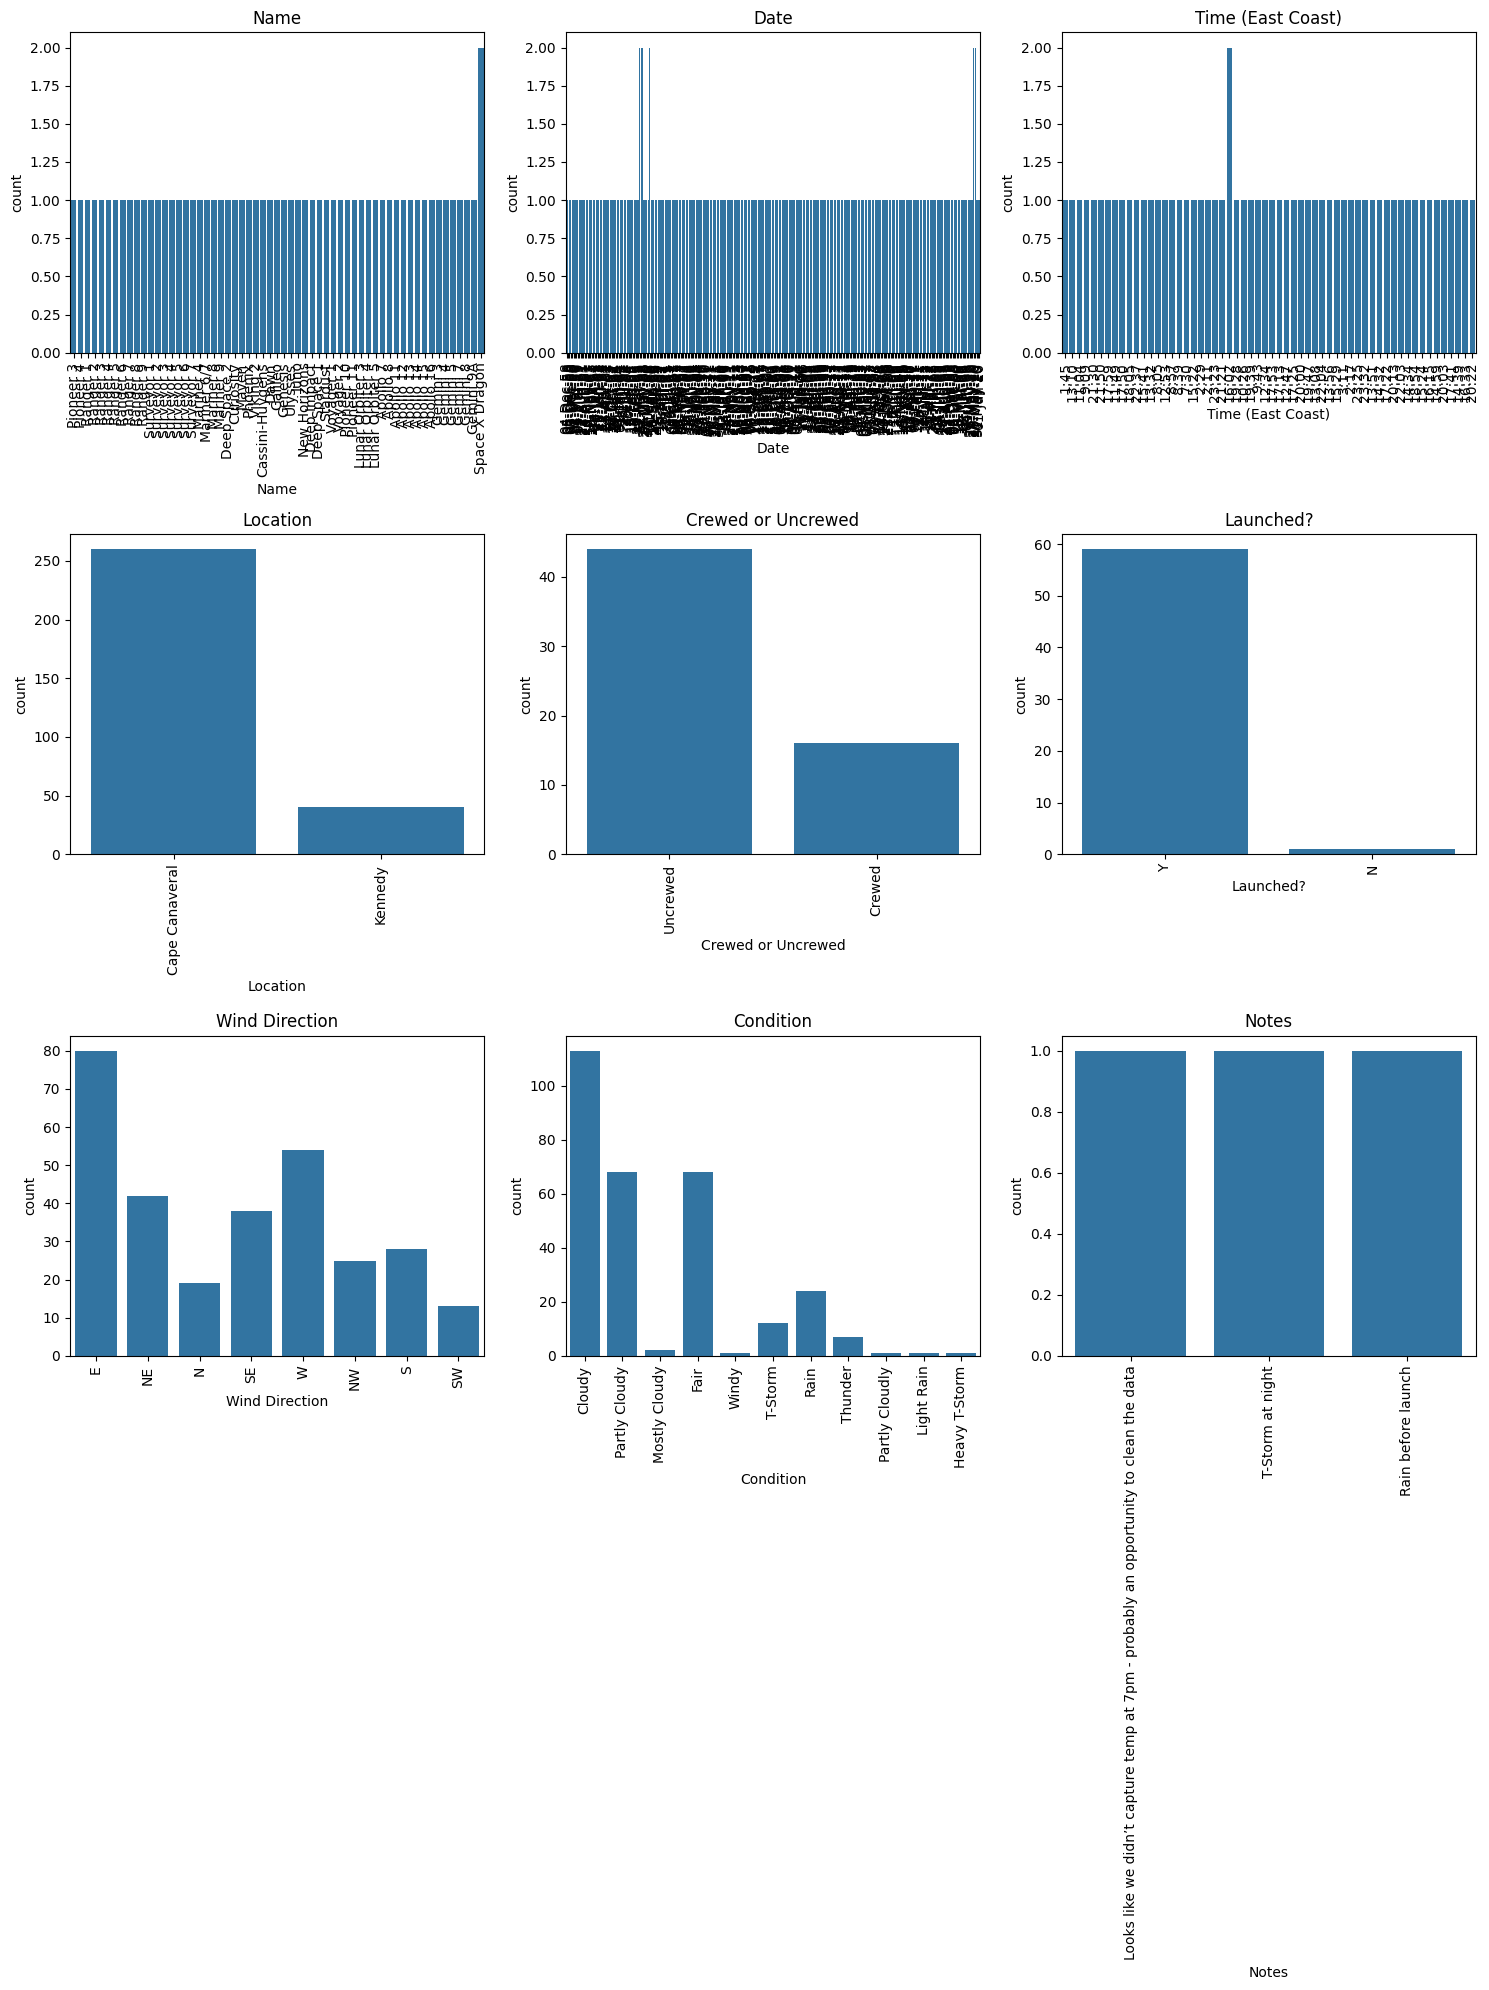

In [7]:
# 데이터타입이 object인 컬럼 추출출
object_cols = rocket.select_dtypes(include=['object']).columns
object_cols

# 데이터 분포 확인
plt.figure(figsize=(15,20))
i = 1
for col in object_cols:
    plt.subplot(3,3,i)
    i+=1
    sns.countplot(data=rocket, x=col)
    plt.xticks(rotation=90)
    plt.title(col)
plt.tight_layout()

## float 타입인 데이터의 분포 확인

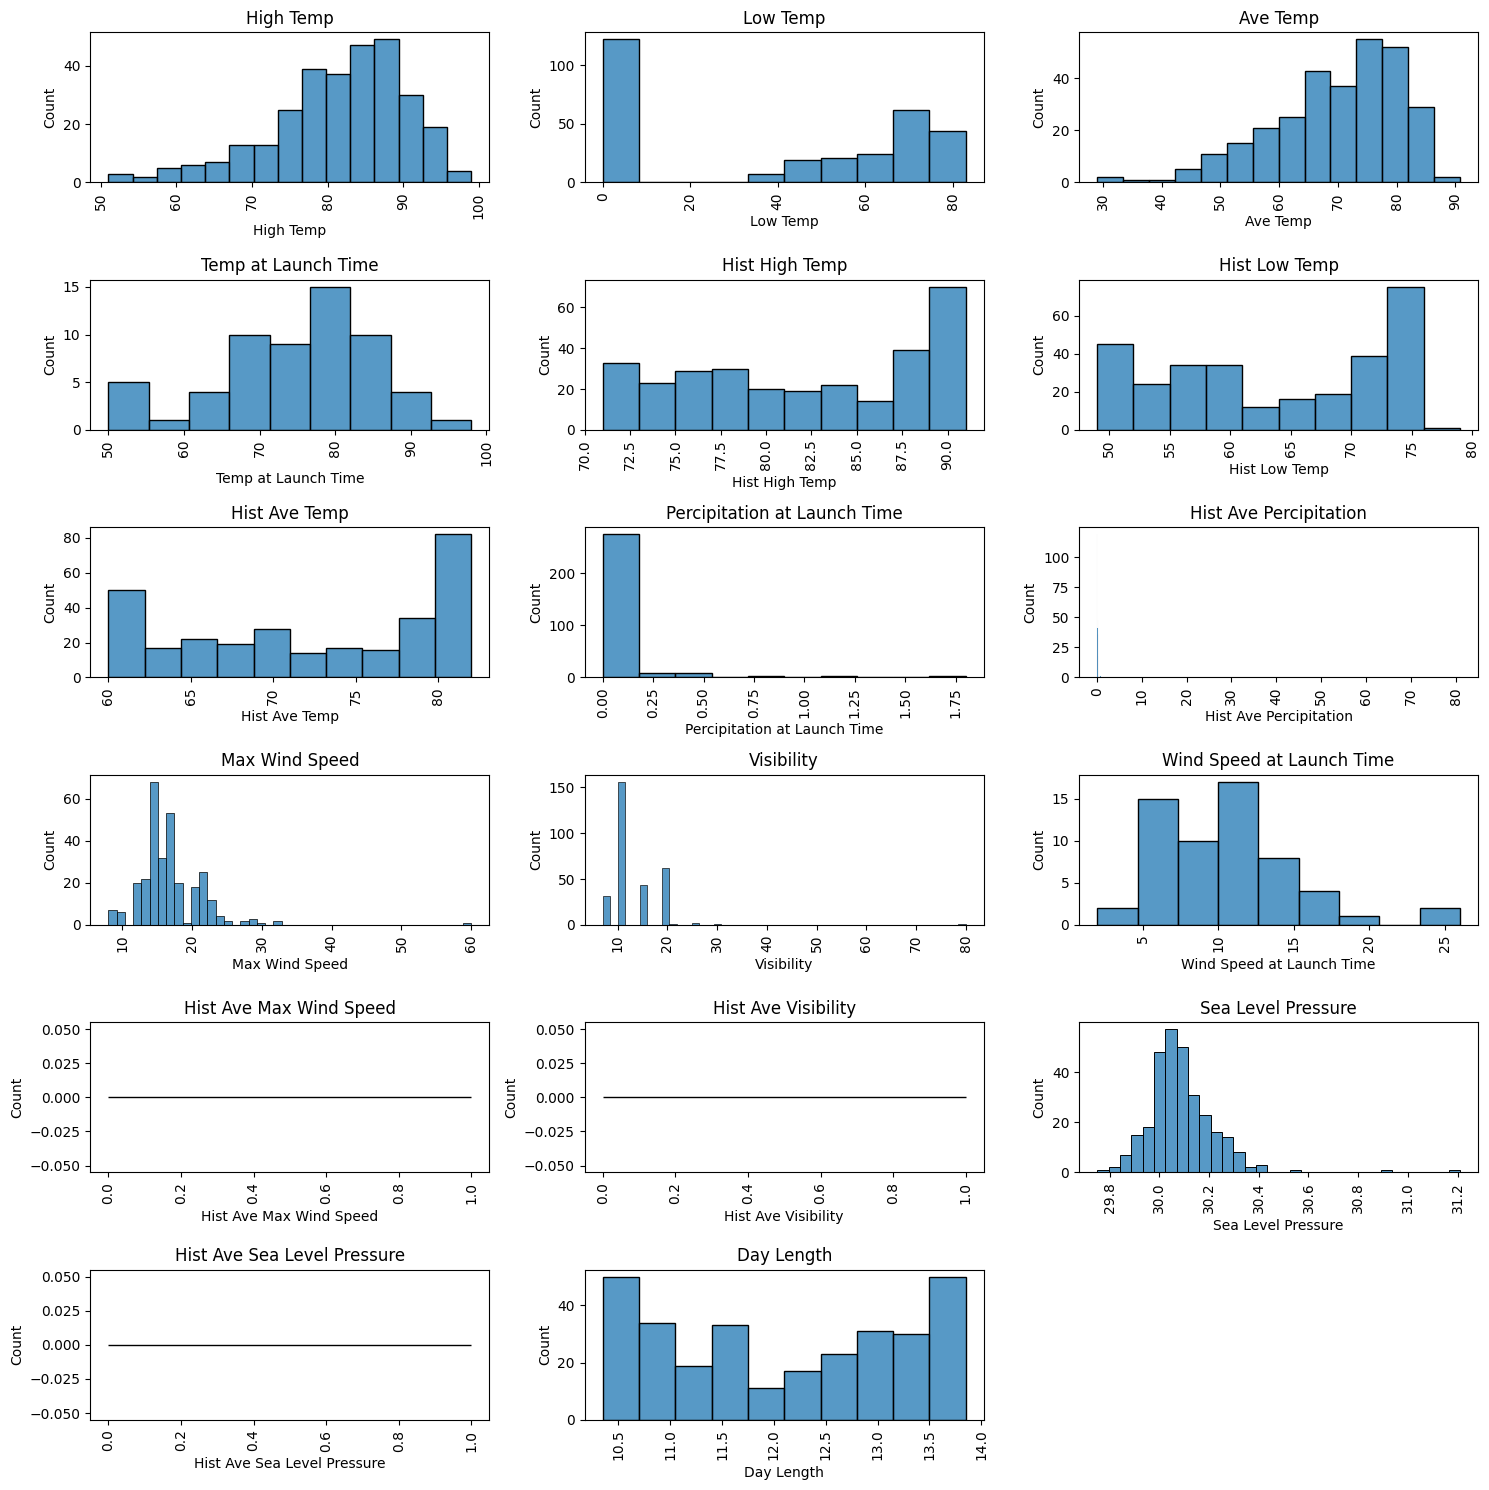

In [8]:
# 데이터타입이 float인 컬럼 추출
numeric_cols = rocket.select_dtypes(include=['int','float']).columns
numeric_cols

# 데이터 분포 확인
plt.figure(figsize=(15,15))
i = 1
for col in numeric_cols:
    plt.subplot(6,3,i)
    i+=1
    sns.histplot(data=rocket, x=col)
    plt.xticks(rotation=90)
    plt.title(col)
plt.tight_layout()

## 데이터 전처리

### 불필요한 컬럼 제거

In [19]:
# 사용하지 않을 컬럼
del_cols = ['Name', 'Date', 'Time (East Coast)','Notes',\
            'Percipitation at Launch Time', 'Hist Ave Percipitation',\
            'Hist Ave Max Wind Speed', 'Hist Ave Visibility','Hist Ave Sea Level Pressure']
df = rocket.drop(columns = del_cols)
# 불필요하다고 생각하는 거를 다 제거한 다음에 비티에프에다가 다시 담았어요.

df.head()

,Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Sea Level Pressure,Day Length,Condition
0,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,75.0,55.0,65.0,E,16.0,15.0,NaN,30.22,10.433333,Cloudy
1,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,75.0,55.0,65.0,E,14.0,10.0,NaN,30.20,10.433333,Cloudy
2,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,75.0,55.0,65.0,NE,15.0,10.0,11.0,30.25,10.416667,Cloudy
3,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,75.0,55.0,65.0,N,10.0,10.0,NaN,30.28,10.416667,Partly Cloudy
4,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,75.0,55.0,65.0,E,12.0,10.0,NaN,30.23,12.400000,Partly Cloudy


### 결측치 확인 및 처리

In [20]:
# 결측치 개수 확인
df.isnull().sum()

Location                       0
Crewed or Uncrewed           240
Launched?                    240
High Temp                      1
Low Temp                       1
Ave Temp                       1
Temp at Launch Time          241
Hist High Temp                 1
Hist Low Temp                  1
Hist Ave Temp                  1
Wind Direction                 1
Max Wind Speed                 1
Visibility                     1
Wind Speed at Launch Time    241
Sea Level Pressure             2
Day Length                     2
Condition                      2
dtype: int64

In [24]:
# Crewed or Uncrewed --> 'Uncrewed'로 채우기
df['Crewed or Uncrewed'] = df['Crewed or Uncrewed'].fillna('Uncrewed')
# 채울 땐 fill, 날릴 땐 drop
# 재할당 또는 inplace=True 로 해야 실제로 채워짐
# 인플레이스는 트로보다는 저는 그냥 재할당을 하는 게 이제 제 스타일이에요. 저는 이게 더 낫더라고요. 
# 인플레이스는 투룸 앞에다가 그냥 해주는 게 나중에 제가 놓쳤나 안 놓쳤나를 보기에 예 더 잘 보여요.

# Launched? --> 'N'으로 채우기
df['Launched?'] = df['Launched?'].fillna('N')

# df['Launched?'].fillna('N')
# df.isnull().sum()

0      N
1      N
2      Y
3      N
4      N
      ..
295    N
296    N
297    Y
298    N
299    N
Name: Launched?, Length: 300, dtype: object

In [28]:
# object타입의 변수들만 뽑아올게요 (오브젝트 타입인 컬럼만 가져오기)
obj_cols = df.select_dtypes(include = ['object']).columns
print(obj_cols)

# object타입 변수의 결측값 채우기 (최빈값으로 채우기)
df[obj_cols] = df[obj_cols].fillna(df[obj_cols].mode().iloc[0])

# df[obj_cols].mode() -> 컬럼별 최빈값을 리턴해줌
# iloc[0] 는 뭔가요? 데이터 프레임으로 리턴 받는데, 2차원임 -> 그냥 쓰면 안 되고 첫 번째 행을 가져오라는 뜻 (시리즈 1차원 형태로)
# mode()를 하면 각 열을 빈도 순서대로 정렬한 행렬을 반환합니다. 여기에서 0번째(제일 빈도가 높은거)를 뽑는겁니다

Index(['Location', 'Crewed or Uncrewed', 'Launched?', 'Wind Direction',
       'Condition'],
      dtype='object')


In [29]:
df[obj_cols].mode()

,Location,Crewed or Uncrewed,Launched?,Wind Direction,Condition
0,Cape Canaveral,Uncrewed,N,E,Cloudy


In [30]:
df[obj_cols].mode().iloc[0]

Location              Cape Canaveral
Crewed or Uncrewed          Uncrewed
Launched?                          N
Wind Direction                     E
Condition                     Cloudy
Name: 0, dtype: object

In [31]:
# 수치형 타입의 변수들만 뽑아올게요 (수치형 타입인 컬럼만 가져오기)
numeric_cols = df.select_dtypes(include = ['int', 'float']).columns
numeric_cols

Index(['High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp', 'Max Wind Speed',
       'Visibility', 'Wind Speed at Launch Time', 'Sea Level Pressure',
       'Day Length'],
      dtype='object')

In [37]:
# float 타입으로 select_types를 하면 float64도 포함되나요? -> 네 , int 가 없네요
df.dtypes

Location                      object
Crewed or Uncrewed            object
Launched?                     object
High Temp                    float64
Low Temp                     float64
Ave Temp                     float64
Temp at Launch Time          float64
Hist High Temp               float64
Hist Low Temp                float64
Hist Ave Temp                float64
Wind Direction                object
Max Wind Speed               float64
Visibility                   float64
Wind Speed at Launch Time    float64
Sea Level Pressure           float64
Day Length                   float64
Condition                     object
dtype: object

In [35]:
# 수치형 타입 변수의 결측값 채우기 (평균값으로 채우기)
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df[numeric_cols]

,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Max Wind Speed,Visibility,Wind Speed at Launch Time,Sea Level Pressure,Day Length
0,75.0,68.0,71.00,75.101695,75.0,55.0,65.0,16.0,15.0,10.59322,30.22,10.433333
1,78.0,70.0,73.39,75.101695,75.0,55.0,65.0,14.0,10.0,10.59322,30.20,10.433333
2,73.0,0.0,60.21,62.000000,75.0,55.0,65.0,15.0,10.0,11.00000,30.25,10.416667
3,76.0,57.0,66.04,75.101695,75.0,55.0,65.0,10.0,10.0,10.59322,30.28,10.416667
4,79.0,60.0,70.52,75.101695,75.0,55.0,65.0,12.0,10.0,10.59322,30.23,12.400000
...,...,...,...,...,...,...,...,...,...,...,...,...
295,87.0,71.0,79.36,75.101695,87.0,70.0,79.0,20.0,10.0,10.59322,30.08,13.750000
296,86.0,72.0,79.50,75.101695,88.0,70.0,79.0,18.0,10.0,10.59322,30.05,13.766667
297,87.0,75.0,79.69,80.000000,88.0,70.0,79.0,16.0,10.0,7.00000,30.03,13.783333
298,87.0,72.0,79.70,75.101695,88.0,70.0,79.0,13.0,10.0,10.59322,30.01,13.783333


In [38]:
# 결측치 개수 최종 확인
df.isnull().sum()

Location                     0
Crewed or Uncrewed           0
Launched?                    0
High Temp                    0
Low Temp                     0
Ave Temp                     0
Temp at Launch Time          0
Hist High Temp               0
Hist Low Temp                0
Hist Ave Temp                0
Wind Direction               0
Max Wind Speed               0
Visibility                   0
Wind Speed at Launch Time    0
Sea Level Pressure           0
Day Length                   0
Condition                    0
dtype: int64

## 독립변수와 종속변수의 관계

<Axes: xlabel='Location', ylabel='count'>

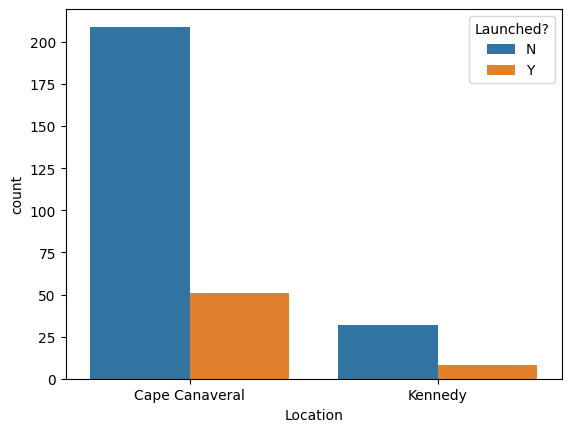

In [ ]:
# 범주형 변수
# 일단 로케이션 먼저 봅시다
df['Location']

# sns.countplot > 데이터의 빈도수를 시각화해 주는 도구
# 로케이션 컬럼에 있는 데이터의 빈도수를 시각화
# 막대그래프로랑은 다른 거죠. 이제 막대 그래프는 이 여기 y 가 들어가는데 지금 그 카운트 플롯은 예 몇 개 들어가 있냐? 니까
# hue = 'Launched?' 론치드로 한번 나눠줘라 구분을 하라는 거예요. 한번 더 색깔로 구분을 해달라는 거죠
sns.countplot(data = df, x = 'Location', hue = 'Launched?')

# 좀 더 자세히 보고 싶으면 지역마다 성공의 비율도 비교해서 판단 -> 파이차트


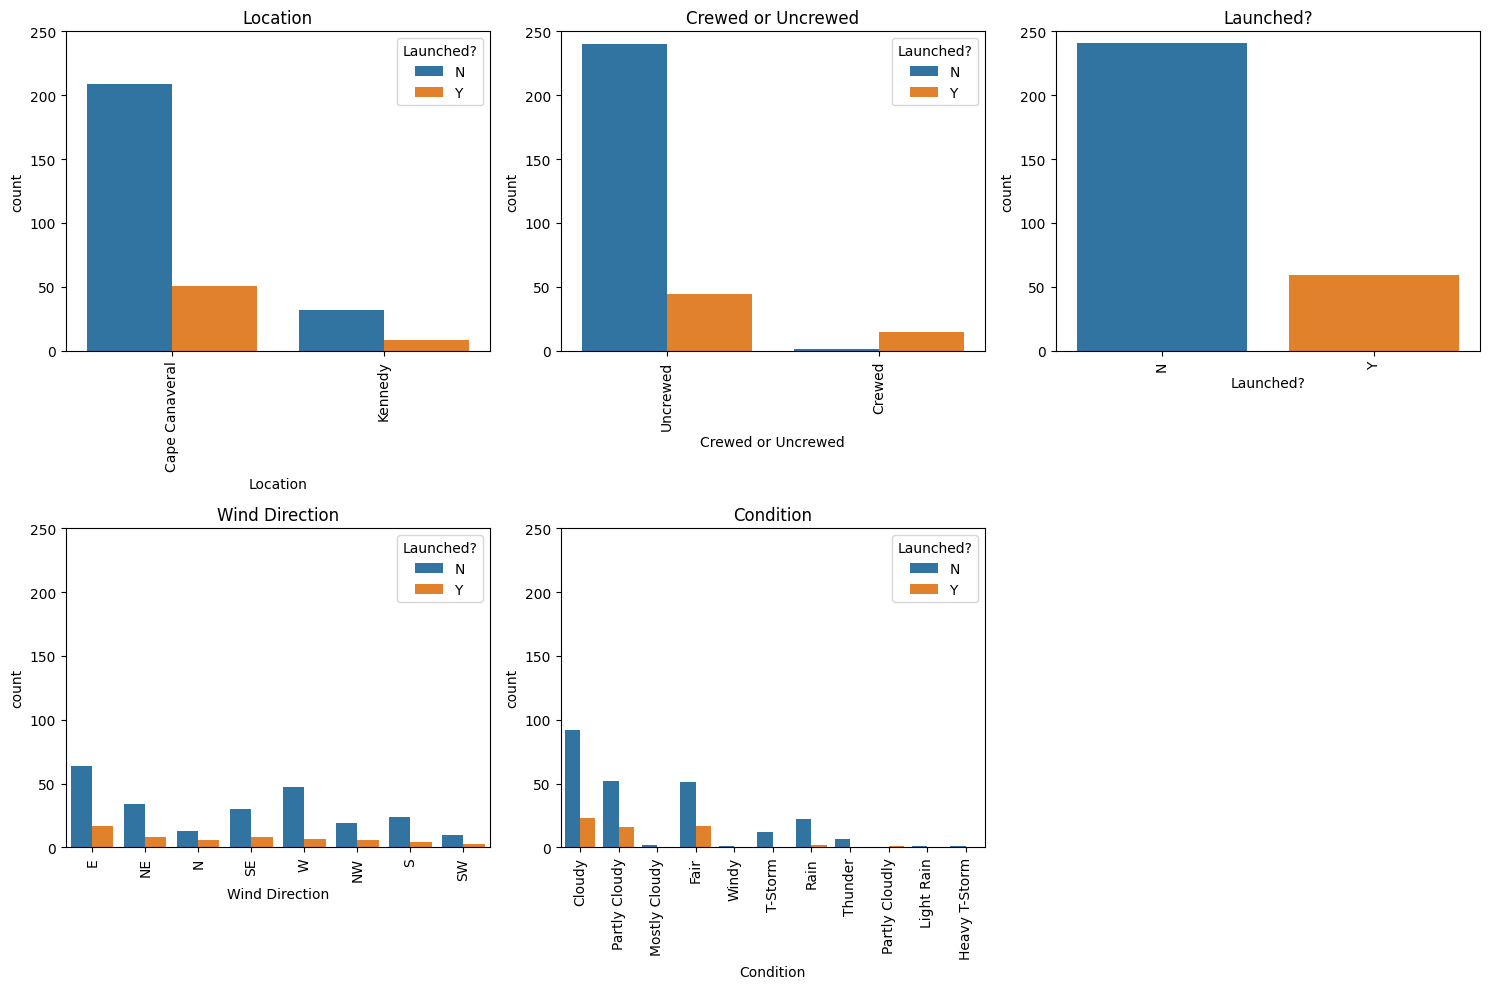

In [52]:
# 범주형 변수
# 일단 로케이션 먼저 봅시다
plt.figure(figsize=(15,10))
i = 1
for col in obj_cols : 
    plt.subplot(2,3,i) # i = 2행 3열의 몇 번 째 초기화? -> 출력할 그래프의 형태를 2행 3열로, 같은번호를 적어서 넣으면 그래프가 겹쳐서 출력됨
    i += 1 # i를 1씩 늘려줌
    sns.countplot(data = df, x = col, hue = 'Launched?')
    plt.xticks(rotation = 90)
    plt.title(col)
    plt.ylim(0,250)
plt.tight_layout()

# 크루드 일 때 성공 Y 확률이 높다는 것을 확인 가능
# 범주형 변수일 때에는 이제 카운트 플러스로 이제 범주별 빈도수를 기준으로 해서 데이터를 보시면 되고요

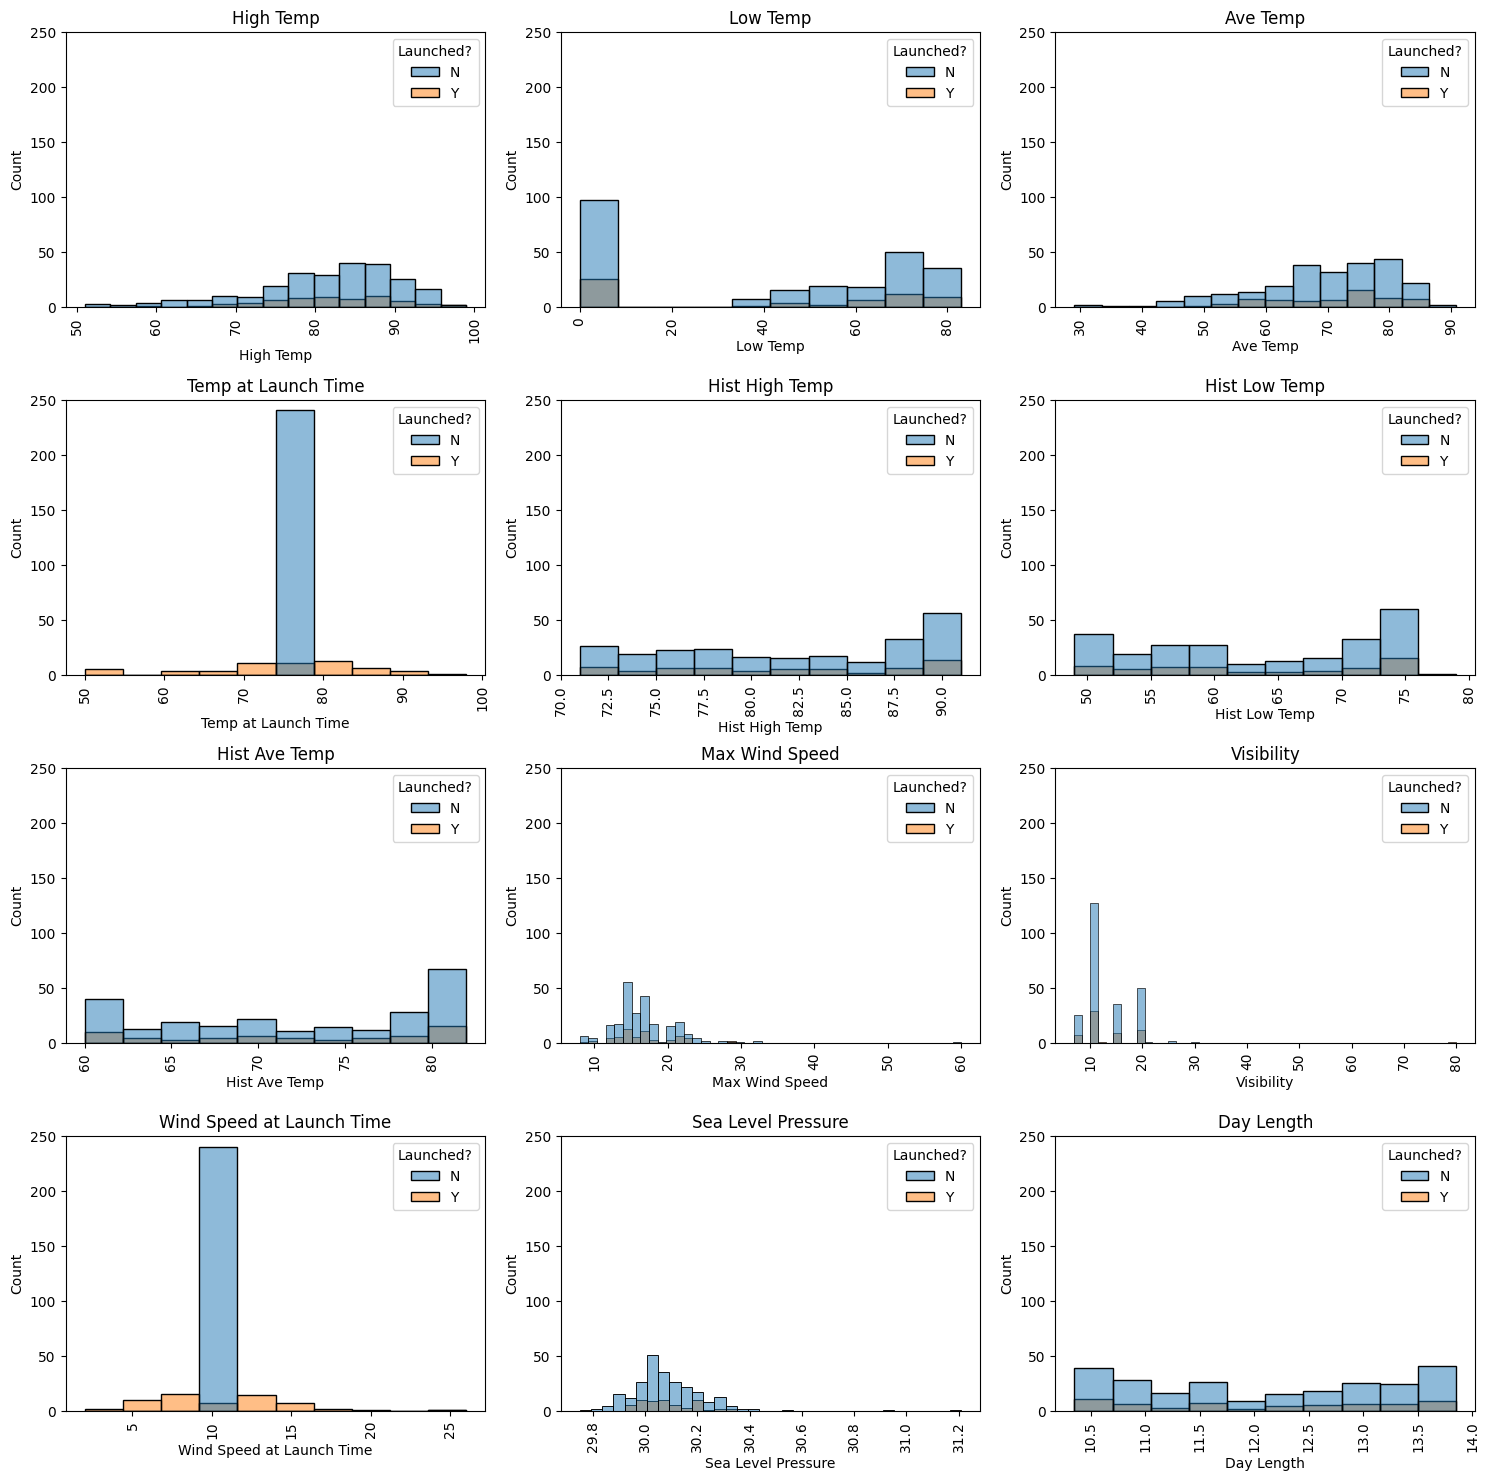

In [56]:
# 수치형 변수
plt.figure(figsize=(15,15))
i = 1
for col in numeric_cols:
    plt.subplot(4,3,i)   # i = 4행 3열의 몇 번 째 초기화? -> 출력할 그래프의 형태를 4행 3열로
    i += 1
    sns.histplot(data=df, x=col, hue='Launched?')
    plt.xticks(rotation=90)
    plt.title(col)
    plt.ylim(0,250)
plt.tight_layout()

# 연속적인 수치로 되어있는 경우에는 이제 대표적인 게 히스토그램이죠. 히스토그램을 이용해서 데이터가 어떻게 분포되어 있는지를 이제 보시면 됩니다.

# 변수 선택

In [79]:
# 범주형 변수가 들어가 있기 때문에 인코딩이 필요함
# 변수 선택할 때 후진 선택법은 전부 다 모든 변수들을 쓴 다음에, 중요하지 않거나 문제가 되는 변수들을 하나씩 제거하면서 선택하는 방법
# 전진 선택법은 하나씩 실행하면서 선택하는 방법

X = df.drop(columns = 'Launched?')
y = df['Launched?']

In [80]:
X.head(3)
# Launched? 빠져 있음

,Location,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Sea Level Pressure,Day Length,Condition
0,Cape Canaveral,Uncrewed,75.0,68.0,71.00,75.101695,75.0,55.0,65.0,E,16.0,15.0,10.59322,30.22,10.433333,Cloudy
1,Cape Canaveral,Uncrewed,78.0,70.0,73.39,75.101695,75.0,55.0,65.0,E,14.0,10.0,10.59322,30.20,10.433333,Cloudy
2,Cape Canaveral,Uncrewed,73.0,0.0,60.21,62.000000,75.0,55.0,65.0,NE,15.0,10.0,11.00000,30.25,10.416667,Cloudy



# 인코딩

## 종속변수 인코딩
* Launched?
    * Y-->1
    * N-->0
    * 명시적으로 바꿔주는 방식

In [81]:
# 일단은 어 그 문자로 되어있는 그 범주형 변수인 코딩은 이제 반드시 해야 되기 때문에 필수적인 인코딩만 일단 할게요. 
# 범주형 변수는 인코딩을 안 하면 머신러닝 훈련을 아예 할 수가 없죠. 
# 수치형 변수는 스케일링을 안 해도 에러는 안 납니다. 이제 성능에 인제 문제가 있는 거죠

# 와이를 일로 보통은 앤을 영으로 하죠
y = y.map({'Y':1, 'N':0})
y.value_counts()

# 수정을 하거나 변환을 한 다음에는 이제 확인을 해주는 게 좋습니다.


Launched?
0    241
1     59
Name: count, dtype: int64

## 독립변수 레이블인코딩

In [82]:
df[obj_cols].head(3)

,Location,Crewed or Uncrewed,Launched?,Wind Direction,Condition
0,Cape Canaveral,Uncrewed,N,E,Cloudy
1,Cape Canaveral,Uncrewed,N,E,Cloudy
2,Cape Canaveral,Uncrewed,Y,NE,Cloudy


In [94]:
# 원핫인코딩은 판다스에 있는 더미스라는 함수를 이용해서 간단하게 했고
# 레이블인코딩은 클래스니까 객체를 만들어야 함
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# 레이블인코딩은 일괄적으로 되지 않아서 포문을 돌면서 하나하나 인코딩 해줘야 함
# 원핫인코딩은 컬럼을 주면 그 컬럼을 알아서 쫙 일괄적으로 해줌

for col in obj_cols : # obj_cols 를 포문으로 돌면서
    X[col] = encoder.fit_transform(X[col]) # 프레임을 학습하고 변환해라 그리고 다시 X 에다가 할당해라

# 포문으로 돌 때 레이블인코딩은 뭐가 1이고 뭐가 0인지 지정을 안 해줘도 되나요?, 지정을 할 수는 있음
# 인코더가 알아서 해줌
# 지정을 할 수는 있음 Condition 처럼 뭔가 숫자를 부여해주고 싶으면 map을 써서 컬럼에 순서를 매겨서 지정할 수 있음

X.head(3)


,Location,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Sea Level Pressure,Day Length,Condition,Launched?
0,0,2,75.0,68.0,71.00,75.101695,75.0,55.0,65.0,0,16.0,15.0,10.59322,30.22,10.433333,0,2
1,0,2,78.0,70.0,73.39,75.101695,75.0,55.0,65.0,0,14.0,10.0,10.59322,30.20,10.433333,0,2
2,0,1,73.0,0.0,60.21,62.000000,75.0,55.0,65.0,2,15.0,10.0,11.00000,30.25,10.416667,0,1


In [95]:
display(rocket['Crewed or Uncrewed'].value_counts())
display(X['Crewed or Uncrewed'].value_counts())

Crewed or Uncrewed
Uncrewed    44
Crewed      16
Name: count, dtype: int64

Crewed or Uncrewed
2    240
1     44
0     16
Name: count, dtype: int64

# 모델링

## 훈련세트/테스트세트 분할


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((225, 17), (75, 17), (225,), (75,))

## 모델 생성 및 훈련

In [74]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

## 분류 모델의 평가지표

In [13]:
#ROC curve와 AUC 

# ROC curve

# AUC

# 모델의 학습 결과

In [14]:
# 시각화

In [15]:
# 트리의 깊이

In [16]:
# 특성의 중요도

# 변수 재선택

# 불균형 데이터 처리

In [17]:
# pip install imblearn

In [18]:
# 오버샘플링

# 다른 모델 적용